In [ ]:
#Install required packages
%pip install seaborn
%pip install scipy

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, norm, t


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Load the dataset
data = pd.read_csv("student_lifestyle_performance.csv")

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# 1 Data Colletion and Sampling Techniques
# Simple Random Sampling
random_sample = data.sample(n=50, random_state=42)

# Stratified Sampling Based on GPA
bins = [0, 2, 3, 4]
labels = ['Low', 'Average', 'High']
data['GPA_Category'] = pd.cut(data['GPA'], bins=bins, labels=labels)
stratified_sample = data.groupby('GPA_Category', group_keys=False).apply(lambda x: x.sample(min(len(x), 10), random_state=42))

# Systematic Sampling
interval = len(data) // 30
systematic_sample = data.iloc[::interval]

# Display the samples
print("Simple Random Sample:", random_sample.head())
print("Stratified Sample:", stratified_sample.head())
print("Systematic Sample:", systematic_sample.head())

Simple Random Sample:       Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
1860        1861                  6.2                            4.0   
353          354                  5.9                            2.2   
1333        1334                  9.6                            2.3   
905          906                  7.2                            0.5   
1289        1290                  9.0                            3.6   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
1860                  6.0                   3.5   
353                   9.9                   5.6   
1333                  8.3                   3.5   
905                   7.6                   2.1   
1289                  9.9                   0.3   

      Physical_Activity_Hours_Per_Day   GPA Stress_Level GPA_Category  
1860                              4.3  2.88     Moderate      Average  
353                               0.4  3.12          Low         High  
1333                  

C:\Users\chori\AppData\Local\Temp\ipykernel_24848\1442518165.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = data.groupby('GPA_Category', group_keys=False).apply(lambda x: x.sample(min(len(x), 10), random_state=42))
C:\Users\chori\AppData\Local\Temp\ipykernel_24848\1442518165.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('GPA_Category', group_keys=False).apply(lambda x: x.sample(min(len(x), 10), random_state=42))


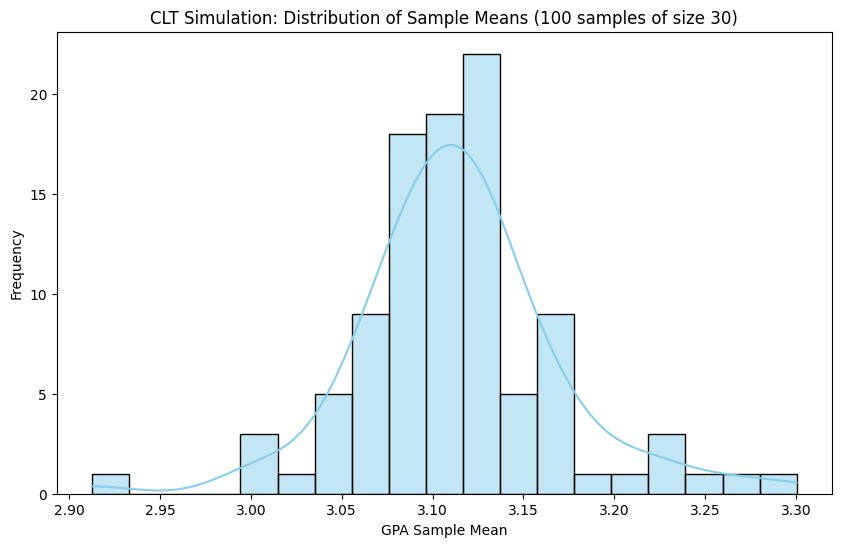

In [18]:
# 2 Central Limit Theorem
# Multiple samples (100) of size 30 from the GPA
sample_means = [data['GPA'].sample(30, replace=True).mean() for _ in range(100)]

# Plotting the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.title('CLT Simulation: Distribution of Sample Means (100 samples of size 30)')
plt.xlabel('GPA Sample Mean')
plt.ylabel('Frequency')
plt.show()


95% Confidence Interval for GPA: (3.1028623653136718, 3.129057634686328)
95% Confidence Interval for Study_Hours_Per_Day: (7.413358680543742, 7.538241319456259)


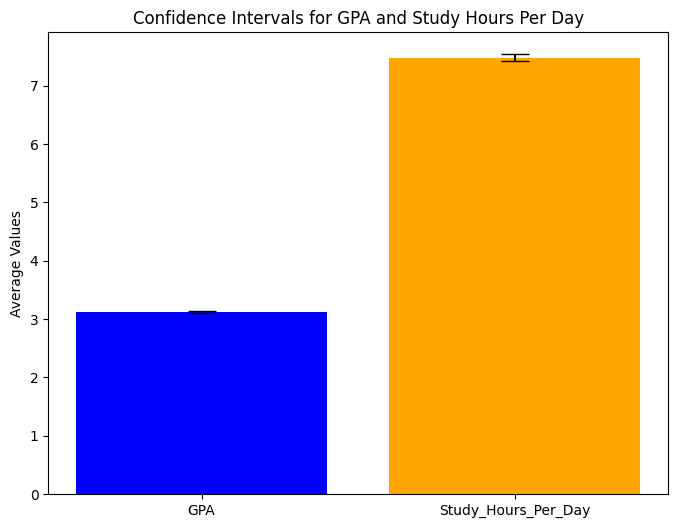

In [ ]:
# 3 Confidence Intervals and Error Bars.
# Calculate confidence intervals for the avarage Hours Studied and GPA

confidence = 0.95
mean_gpa = data['GPA'].mean()
std_gpa = data['GPA'].std()
n = len(data['GPA'])
margin_error = t.ppf((1 + confidence) / 2, n - 1) * (std_gpa / np.sqrt(n))
ci_gpa = (mean_gpa - margin_error, mean_gpa + margin_error)

mean_study = data['Study_Hours_Per_Day'].mean()
std_study = data['Study_Hours_Per_Day'].std()
margin_error_study = t.ppf((1 + confidence) / 2, n - 1) * (std_study / np.sqrt(n))
ci_study = (mean_study - margin_error_study, mean_study + margin_error_study)

print(f"95% Confidence Interval for GPA: {ci_gpa}")
print(f"95% Confidence Interval for Study Hours Per Day: {ci_study}")

# Visualization with Error Bars
plt.figure(figsize=(8, 6))
plt.bar(['GPA', 'Study_Hours_Per_Day'], [mean_gpa, mean_study], yerr=[margin_error, margin_error_study], color=['blue', 'orange'], capsize=10)
plt.title('Confidence Intervals for GPA and Study Hours Per Day')
plt.ylabel('Average Values')
plt.show()

Hours_Studied_Per_Week vs GPA: Pearson Correlation = 0.73, p-value = 0.000
Screen_Time_Per_Day vs GPA: Pearson Correlation = -0.09, p-value = 0.000
Hours_of_Sleep_Per_Night vs GPA: Pearson Correlation = -0.01, p-value = 0.781


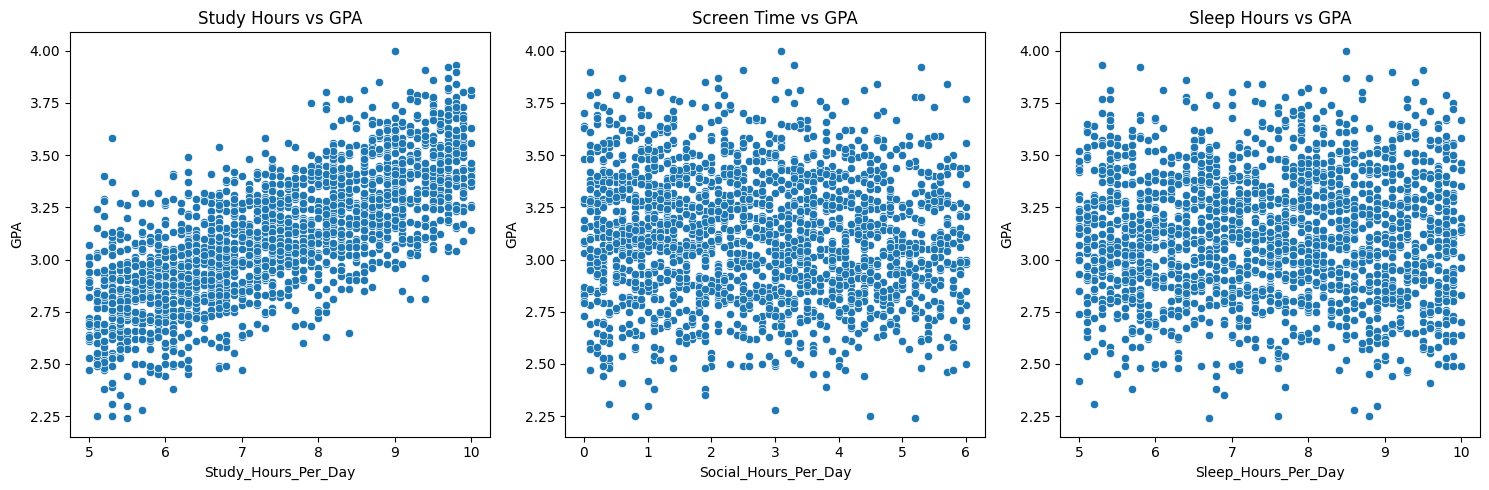

In [ ]:
# 4 Correlation Analysis

# Calculate Pearson and Spearman correlation coefficients
correlations = {
    "Hours_Studied_Per_Week vs GPA": pearsonr(data['Study_Hours_Per_Day'], data['GPA']),
    "Screen_Time_Per_Day vs GPA": pearsonr(data['Social_Hours_Per_Day'], data['GPA']),
    "Hours_of_Sleep_Per_Night vs GPA": spearmanr(data['Sleep_Hours_Per_Day'], data['GPA'])
}

for desc, corr in correlations.items():
    print(f"{desc}: Pearson Correlation = {corr[0]:.2f}, p-value = {corr[1]:.3f}")

# Scatter Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=data)
plt.title('Study Hours vs GPA')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Social_Hours_Per_Day', y='GPA', data=data)
plt.title('Screen Time vs GPA')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=data)
plt.title('Sleep Hours vs GPA')

plt.tight_layout()
plt.show()

'''
Correlation ≠ Causation
Real-life examples:

Ice Cream Sales vs Drowning Rates: These two things correlate because both rise in summer — but ice cream doesn’t cause drownings. The hidden factor (temperature) influences both.
More Social Hours vs Lower GPA: It might look like socializing lowers GPA, but the real culprit could be time management. Students who balance socializing and studying well might still perform great.
Hours Studied vs GPA: Studying more correlates with higher GPA, but it doesn’t guarantee success — study quality, test anxiety, or even the professor’s teaching style could be influencing GPA too.
'''